In [9]:
import pandas as pd
import numpy as np
import os
os.makedirs(r'/Users/pravinkumar/Documents/Streamlit_Bank_Loan', exist_ok=True)
os.chdir(r'/Users/pravinkumar/Documents/Streamlit_Bank_Loan')

In [10]:
## Pandas
## Numpy
## SKlearn
## Matplotlib

In [11]:
train=pd.read_csv('/Users/pravinkumar/Documents/CSP/Loan_Data/train.csv')
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})

Check the missing Values in data

In [12]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
train = pd.read_csv('/Users/pravinkumar/Documents/CSP/Loan_Data/train.csv')

print(train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


Preprocessing on the data

In [14]:
Loan_status=train.Loan_Status
train.drop('Loan_Status',axis=1,inplace=True)
test=pd.read_csv('/Users/pravinkumar/Documents/CSP/Loan_Data/test.csv')
Loan_ID=test.Loan_ID
data = pd.concat([train, test], ignore_index=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [15]:
data.shape

(981, 12)

In [16]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [17]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [18]:
data.Dependents.dtypes

dtype('O')

In [19]:
# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corrmat = numeric_data.corr()

# Plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

Label ENcode

In [84]:
## Label encoding for gender
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

,count
Gender,
1.0,775
0.0,182


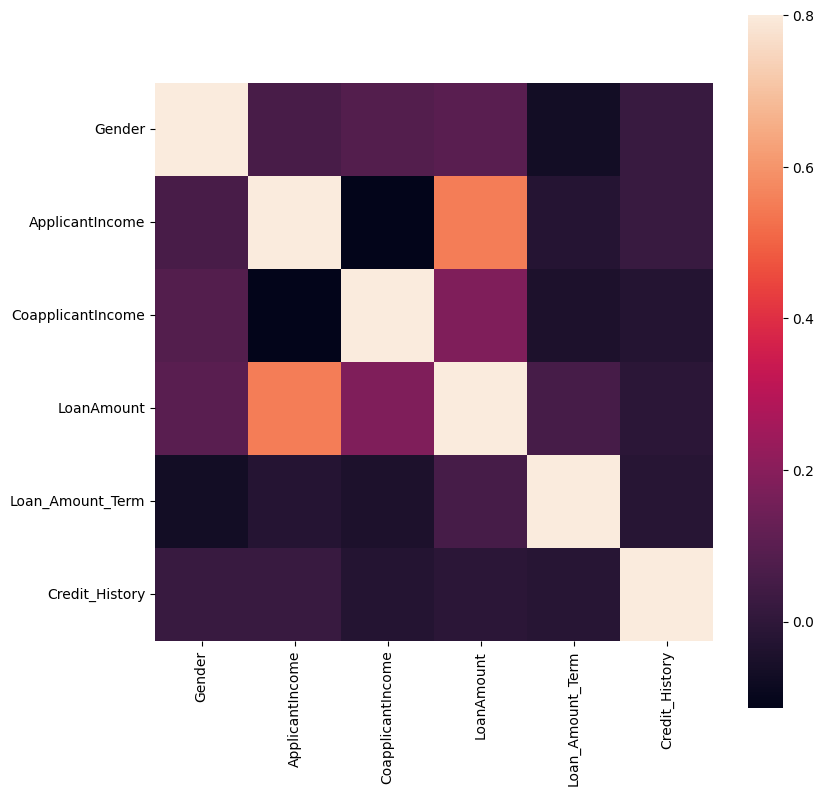

In [85]:
# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corrmat = numeric_data.corr()

# Plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [86]:
## Labelling 0 & 1 for Marrital status
data.Married=data.Married.map({'Yes':1,'No':0})

In [87]:
data.Married.value_counts()

,count
Married,
1.0,631
0.0,347


In [88]:
## Labelling 0 & 1 for Dependents
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [89]:
data.Dependents.value_counts()

,count
Dependents,
0.0,545
1.0,160
2.0,160
3.0,91


Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


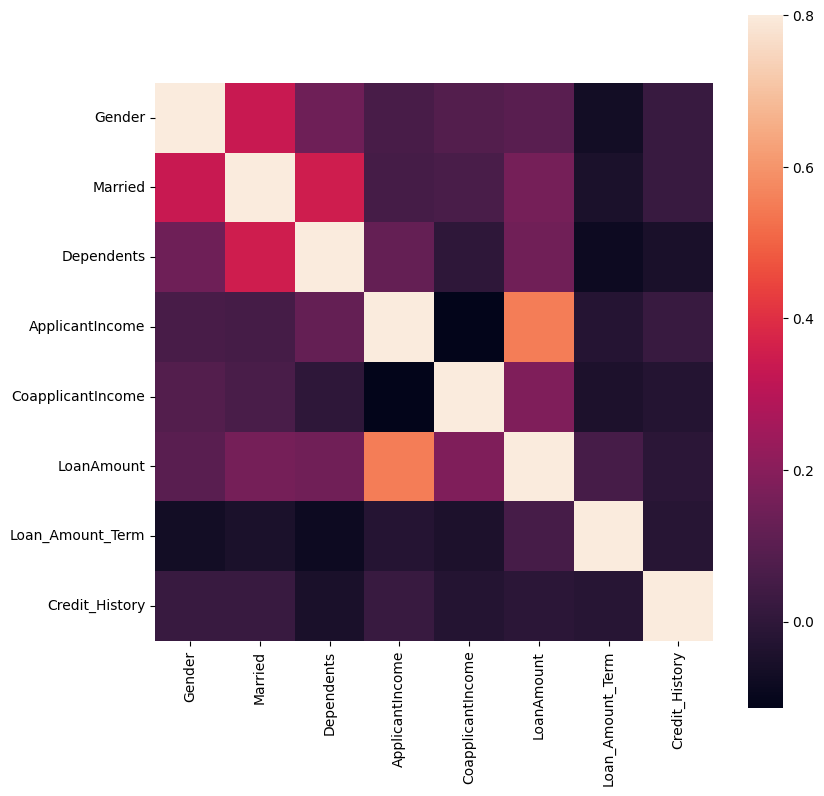

In [90]:
# Step 1: Inspect the data types
print(data.dtypes)

# Step 2: Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Step 3: Compute the correlation matrix
corrmat = numeric_data.corr()

# Step 4: Plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [91]:
## Labelling 0 & 1 for Education Status
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [92]:
data.Education.value_counts()

,count
Education,
1,763
0,218


In [93]:
## Labelling 0 & 1 for Employment status
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

In [94]:
data.Self_Employed.value_counts()

,count
Self_Employed,
0.0,807
1.0,119


In [95]:
data.Property_Area.value_counts()

,count
Property_Area,
Semiurban,349
Urban,342
Rural,290


In [96]:
## Labelling 0 & 1 for Property area
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [97]:
data.Property_Area.value_counts()

,count
Property_Area,
1,349
2,342
0,290


<Axes: >

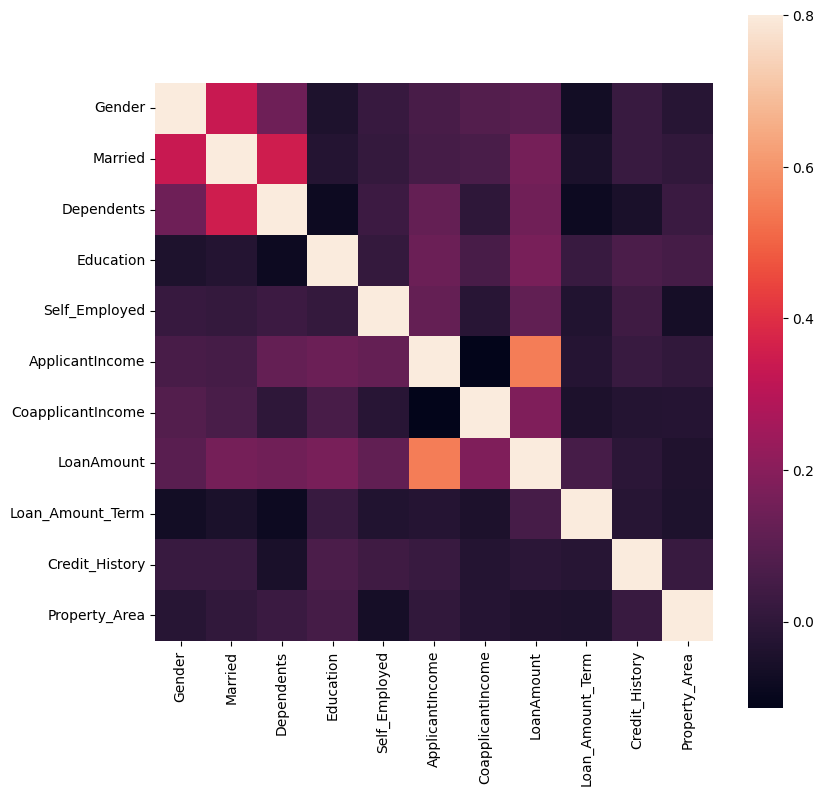

In [98]:
numeric_data = data.select_dtypes(include=[np.number])

# Step 3: Compute the correlation matrix
corrmat = numeric_data.corr()

# Step 4: Plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [99]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [100]:
data.Credit_History.size

981

It's time to fill the missing values

In [101]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [102]:
data.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,3
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20


In [103]:
data.Married.fillna(np.random.randint(0,2),inplace=True)

In [104]:
data.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,0
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20


In [105]:
## Filling with median
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

In [106]:
## Filling with mean
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [107]:
data.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,0
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [108]:
data.Gender.value_counts()

,count
Gender,
1.0,775
0.0,182


In [109]:
## Filling Gender with random number between 0-2
from random import randint
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [110]:
data.Gender.value_counts()

,count
Gender,
1.0,799
0.0,182


In [111]:
## Filling Dependents with median
data.Dependents.fillna(data.Dependents.median(),inplace=True)

In [112]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: >

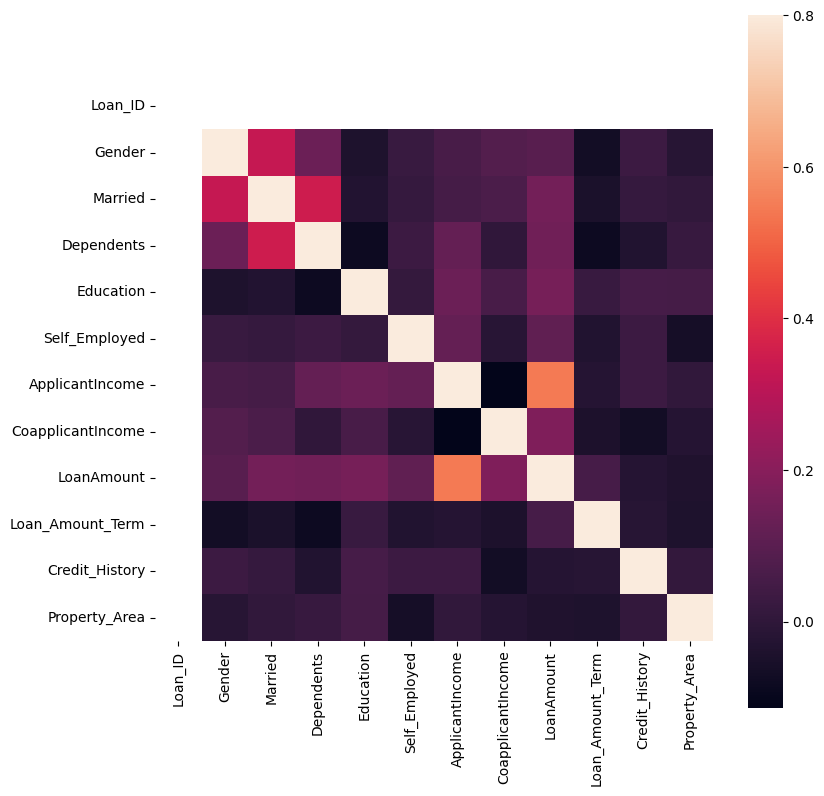

In [113]:
numeric_data = data.select_dtypes(include=[np.number])

# Alternatively, if you suspect some numeric columns are not being recognized:
# Convert columns to numeric, coercing errors (this will turn non-convertible values to NaN)
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Step 3: Select only numeric columns again after coercion
numeric_data = data.select_dtypes(include=[np.number])

# Step 4: Compute the correlation matrix
corrmat = numeric_data.corr()

# Step 5: Plot the heatmap
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [114]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [115]:
data.isnull().sum()

,0
Loan_ID,981
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [116]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,NaN,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,NaN,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,NaN,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,NaN,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,NaN,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [117]:
## Dropping Loan ID from data, it's not useful
data.drop('Loan_ID',inplace=True,axis=1)

In [118]:
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [119]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


Split the Data into X & Y

In [120]:
train_X=data.iloc[:614,] ## all the data in X (Train set)
train_y=Loan_status  ## Loan status will be our Y

In [121]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=0)

In [122]:
#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
#sc_f = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
train_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,1.0,1.0,1.0,1,0.0,5649,0.0,44.0,360.0,1.0,2
272,1.0,0.0,0.0,1,0.0,2833,1857.0,126.0,360.0,1.0,0
474,1.0,0.0,2.0,1,0.0,5532,4648.0,162.0,360.0,1.0,0
382,0.0,0.0,0.0,1,0.0,6000,0.0,156.0,360.0,1.0,2
283,0.0,0.0,0.0,1,0.0,1811,1666.0,54.0,360.0,1.0,2


In [123]:
test_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1.0,0.0,0.0,1,1.0,7085,0.0,84.0,360.0,1.0,1
52,0.0,0.0,0.0,1,0.0,4230,0.0,112.0,360.0,1.0,1
536,1.0,1.0,0.0,1,0.0,6133,3906.0,324.0,360.0,1.0,2
469,1.0,1.0,0.0,1,0.0,4333,2451.0,110.0,360.0,1.0,2
55,1.0,1.0,2.0,1,0.0,2708,1167.0,97.0,360.0,1.0,1


Using Different types of Machine Learning Model

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Fit the all ML Models

In [125]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [126]:
scoring='accuracy'

In [127]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [128]:
from sklearn.model_selection import KFold, cross_val_score

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)  # Shuffle enabled
    cv_result = cross_val_score(model, train_X, train_y, cv=kfold, scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name, cv_result.mean()))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression()
Logistic Regression 0.754348
DecisionTreeClassifier()
Decision Tree 0.658696
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.760870
RandomForestClassifier()
Random Forest 0.721739
SVC()
Support Vector Classifier 0.671739
KNeighborsClassifier()
K- Neirest Neighbour 0.643478
GaussianNB()
Naive Bayes 0.741304


In [129]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR=LogisticRegression()
LR.fit(train_X,train_y)
pred=LR.predict(test_X)
print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Model Accuracy:-  0.8116883116883117
[[ 23  20]
 [  9 102]]
              precision    recall  f1-score   support

           N       0.72      0.53      0.61        43
           Y       0.84      0.92      0.88       111

    accuracy                           0.81       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.80      0.81      0.80       154



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [130]:
print(pred)

['Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N']


In [131]:
X_test=data.iloc[614:,]
# X_test[sc_f]=SC.fit_transform(X_test[sc_f])

In [132]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
614,1.0,1.0,0.0,1,0.0,5720,0.0,110.0,360.0,1.0,2
615,1.0,1.0,1.0,1,0.0,3076,1500.0,126.0,360.0,1.0,2
616,1.0,1.0,2.0,1,0.0,5000,1800.0,208.0,360.0,1.0,2
617,1.0,1.0,2.0,1,0.0,2340,2546.0,100.0,360.0,0.0,2
618,1.0,0.0,0.0,0,0.0,3276,0.0,78.0,360.0,1.0,2


In [133]:
prediction = LR.predict(X_test)

In [134]:
print(prediction)

['Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y

In [135]:
## TAken data from the dataset
t = LR.predict([[0.0,	0.0,	0.0,	1,	0.0,	1811,	1666.0,	54.0,	360.0,	1.0,	2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [136]:
print(t)

['Y']


In [141]:
import pickle
from sklearn.svm import SVC

# Define and train your model
svc = SVC()
svc.fit(train_X, train_y)  # Ensure your training data is available

# Now save it to a file
file = '/content/ML_Model.pkl'
with open(file, 'wb') as f:
    pickle.dump(svc, f)


In [142]:
with open(file, 'rb') as f:
    k = pickle.load(f)

In [143]:
cy = k.predict([[0.0,	0.0,	0.0,	1,	0.0,	4230,	0.0,	112.0,	360.0,	1.0,	1]])
print(cy)

['Y']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
